<a href="https://colab.research.google.com/github/ameympatil/NLP/blob/main/SMS_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SMS Classifiers

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d uciml/sms-spam-collection-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 85.9MB/s]


In [ ]:
! unzip sms-spam-collection-dataset.zip

Archive:  sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [14]:
import pandas as pd
df = pd.read_csv('/content/spam.csv',encoding='latin-1')

In [15]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


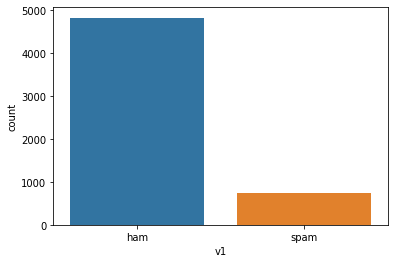

In [16]:
import seaborn as sns
sns.countplot(df.v1)

In [19]:
X = df.v2
y = df.v1

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
#y=y.reshape(-1,1)

In [30]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [25]:
import nltk
import re
from nltk.corpus import stopwords

In [26]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer ##stemming purpose
ps = PorterStemmer()
corpus = []
for i in range(0, len(X)):
    review = re.sub('[^a-zA-Z]', ' ', X[i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [28]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [29]:
corpus[1]

'ok lar joke wif u oni'

In [32]:
### Vocabulary size
voc_size=1000

In [33]:
onehot_repr = []
for words in corpus:
  onehot_repr.append(one_hot(words,voc_size))

onehot_repr

[[777,
  990,
  647,
  445,
  313,
  421,
  70,
  870,
  51,
  440,
  544,
  319,
  135,
  989,
  414,
  901],
 [905, 857, 632, 835, 143, 689],
 [196,
  733,
  408,
  19,
  960,
  988,
  355,
  610,
  681,
  22,
  689,
  987,
  988,
  219,
  733,
  860,
  865,
  578,
  516,
  978,
  396],
 [143, 127, 934, 2, 102, 143, 978, 713, 934],
 [411, 938, 297, 208, 310, 395, 286],
 [841,
  573,
  161,
  801,
  651,
  547,
  687,
  888,
  469,
  854,
  905,
  292,
  865,
  183,
  330,
  676],
 [196, 626, 687, 830, 811, 687, 302, 417],
 [688, 618, 713, 713, 540, 938, 469, 384, 282, 848, 35, 796, 190, 307, 848],
 [343, 647, 701, 972, 480, 997, 902, 269, 350, 660, 350, 919, 947, 39, 760],
 [223,
  140,
  143,
  760,
  314,
  549,
  399,
  991,
  223,
  983,
  196,
  660,
  223,
  549,
  924,
  196],
 [933, 997, 325, 500, 458, 115, 157, 178, 591, 677, 539, 96],
 [234,
  645,
  960,
  812,
  917,
  578,
  601,
  330,
  275,
  997,
  958,
  958,
  324,
  396,
  610,
  338,
  398],
 [918,
  801,
  196,


In [34]:
corpus[1]

'ok lar joke wif u oni'

In [35]:
onehot_repr[1]

[905, 857, 632, 835, 143, 689]

In [36]:
sent_length=30
embedded_docs=pad_sequences(onehot_repr,padding='post',maxlen=sent_length)
print(embedded_docs)

[[777 990 647 ...   0   0   0]
 [905 857 632 ...   0   0   0]
 [196 733 408 ...   0   0   0]
 ...
 [118   3 649 ...   0   0   0]
 [865 783 639 ...   0   0   0]
 [535 582 114 ...   0   0   0]]


In [37]:
## Creating model
embedding_vector_features=40 ##features representation
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 40)            40000     
                                                                 
 lstm (LSTM)                 (None, 100)               56400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 96,501
Trainable params: 96,501
Non-trainable params: 0
_________________________________________________________________
None


In [40]:
len(embedded_docs),y.shape

(5572, (5572,))

In [41]:
import numpy as np
X_final=np.array(embedded_docs)
y_final=np.array(y)

In [42]:
X_final.shape,y_final.shape

((5572, 30), (5572,))

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_final,y_final,test_size=0.15)

In [44]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=32)

Epoch 1/10
148/148 [==============================] - 8s 9ms/step - loss: 0.1961 - accuracy: 0.9333 - val_loss: 0.0743 - val_accuracy: 0.9725
Epoch 2/10
148/148 [==============================] - 1s 6ms/step - loss: 0.0607 - accuracy: 0.9848 - val_loss: 0.0995 - val_accuracy: 0.9689
Epoch 3/10
148/148 [==============================] - 1s 5ms/step - loss: 0.0423 - accuracy: 0.9888 - val_loss: 0.0719 - val_accuracy: 0.9761
Epoch 4/10
148/148 [==============================] - 1s 5ms/step - loss: 0.0305 - accuracy: 0.9930 - val_loss: 0.1019 - val_accuracy: 0.9749
Epoch 5/10
148/148 [==============================] - 1s 5ms/step - loss: 0.0223 - accuracy: 0.9951 - val_loss: 0.1623 - val_accuracy: 0.9689
Epoch 6/10
148/148 [==============================] - 1s 5ms/step - loss: 0.0267 - accuracy: 0.9941 - val_loss: 0.1280 - val_accuracy: 0.9653
Epoch 7/10
148/148 [==============================] - 1s 5ms/step - loss: 0.0243 - accuracy: 0.9951 - val_loss: 0.1167 - val_accuracy: 0.9785
Epoch 

In [45]:
y_pred=model.predict(X_test)

27/27 [==============================] - 1s 4ms/step


In [47]:
y_pred=np.where(y_pred > 0.6, 1,0) ##AUC ROC Curve

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[733,   1],
       [ 17,  85]])

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9784688995215312

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       734
           1       0.99      0.83      0.90       102

    accuracy                           0.98       836
   macro avg       0.98      0.92      0.95       836
weighted avg       0.98      0.98      0.98       836

